In [284]:
import pandas as pd
import numpy as np


### 统计部分

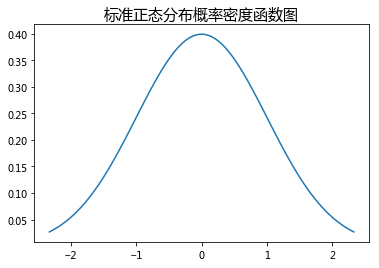

In [245]:
# 标准正态分布
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(norm.ppf(0.01),norm.ppf(0.99),100)
plt.plot(x,norm.pdf(x))
plt.title(u'标准正态分布概率密度函数图', size=15)
plt.show()

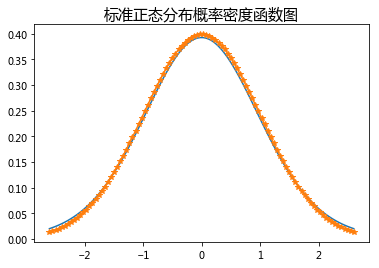

In [408]:
# t分布
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
df=15
x=np.linspace(t.ppf(0.01,df),t.ppf(0.99,df),100)
# plt.subplot(121)
plt.plot(x,t.pdf(x,df))
plt.plot(x,t.pdf(x,1000),marker='*')
plt.title(u'标准正态分布概率密度函数图', size=15)
plt.show()

Text(0.5, 1.0, '自由度为5和8时的f分布概率密度函数图')

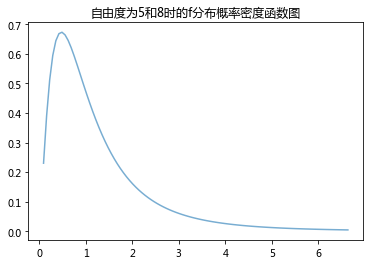

In [283]:
# F分布
from scipy.stats import f
df = 5
dn = 8
x = np.linspace(f.ppf(0.01, df, dn), f.ppf(0.99, df, dn), 100)
# print(f.ppf(0.95, df, dn))
plt.plot(x, f.pdf(x, df, dn), alpha=0.6, label='f pdf')
plt.title(u'自由度为5和8时的f分布概率密度函数图')

In [348]:
# chi2分布
data=pd.read_csv('/Users/rickie/Desktop/czbank_test/titanic_data.csv')
data.groupby(['Pclass']).Survived.count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [407]:
from scipy.stats import chi2_contingency,chi2,chisquare
Pclass_Sur=data.pivot_table('Name',index='Pclass',columns='Survived',aggfunc='count')
g, p, dof, expctd =chi2_contingency(Pclass_Sur)
p

4.549251711298793e-23

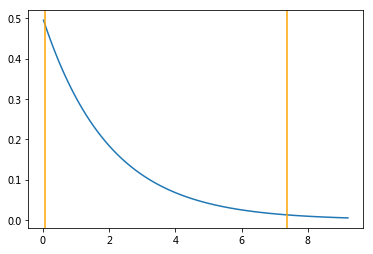

In [395]:
x=np.linspace(chi2.ppf(0.01,dof),chi2.ppf(0.99,dof),100)
plt.figure()
plt.plot(x,chi2.pdf(x,dof))
plt.axvline(chi2.ppf(0.025,dof),color='orange')
plt.axvline(chi2.ppf(0.975,dof),color='orange')

In [406]:
d=data[['Pclass','Survived','Sex']].groupby(['Survived','Pclass']).count().unstack()
d
chi2_contingency(d)


(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

### python基础

In [47]:
# -*- coding: utf-8 -*-

from functools import reduce
from collections import Iterable
def str2float(s):
    L=s.split('.')
    
    def char2num(s):
        DIGITS = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
        return DIGITS[s]
    def fn(x, y):
        return x * 10 + y
    return reduce(fn,map(char2num,L[0]))+reduce(fn,map(char2num,L[1]))/10**len(L[1])
str2float('3.567')


3.567

In [175]:
def createCounter():
    sum=0
    def counter():
        nonlocal sum
        sum+=1
        return sum
    return counter
    
counterA = createCounter()
print(counterA(), counterA(), counterA(), counterA(), counterA())    